# Exploratory Data Analysis with Seaborn

### Objectives

This notebook will cover the Seaborn visualization library in Python. This notebook assumes no previous visualization knowledge.

The [Python Seaborn library][1] is a high-level, easy-to-use interface for creating powerful and beautiful visualizations. Seaborn does not actually perform any of the visualizations but instead, calls the primary Python visualization library, matplotlib, to do all the heavy lifting.


## Minimum amount of Matplotlib

### Figure - Axes Hierarchy

![][2]

We won't be doing much work in matplotlib, but you must understand the Figure - Axes hierarchy. A matplotlib **Figure** is at the top of hierarchy and contains all of the plotting elements. You will rarely work with the Figure directly. A matplotlib **Axes** is the individual "plot". You can have any number of Axes in a Figure.

### Axes is a confusing term
In matplotlib terminology, Axes is not the plural of the word "axis". It refers to an individual plotting surface within the figure.

### Most Figures have one Axes
The above Figure had 6 Axes, but this was just used as a teaching example to distinguish the Axes from the Figure. Most of the Figures in this notebook will have a single Axes.

# Exploratory Data Analysis
When first laying your hands on a dataset, it is important to explore it. EDA is an approach to take that involves understanding your data without the formal use of statistical methods and relies heavily on visualization.

### Seaborn is a great tool for EDA
Seaborn allows us to make a number of interesting and beautiful plots without doing any calculations ourselves. It will group and aggregate data without the need of Pandas.

### Seaborn integration with Pandas
Nearly all Seaborn plotting functions contain a **`data`** parameter that accepts a Pandas DataFrame. This allows you to use strings for the column names for the other arguments in the plotting functions.

### Upgrade Seaborn to 0.9
Open up a terminal and execute `conda update seaborn` before continuing

# Tour of Seaborn API
Keep [Seaborn's API][3] open for the remainder of the notebook. We will cover the best parts of it.

[1]: http://seaborn.pydata.org
[2]: images/fig_ax.png
[3]: http://seaborn.pydata.org/api.html

# Read in our data

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Heart disease dataset
We are working with a heart disease dataset from the [Machine Learning with a Heart][1] competition provided by Driven Data. You can also find this dataset in University of California at Irving's famous [machine learning repository][2].

[1]: https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/
[2]: http://archive.ics.uci.edu/ml/datasets/statlog+(heart)

In [2]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,slope,thal,rest_bp,chest_pain,num_major_vessels,sugar,rest_ekg,chol,oldpeak,sex,age,max_heart_rate,angina,disease
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


### Read in the data dictionary

In [3]:
pd.options.display.max_colwidth = 150
heart_dd = pd.read_csv('data/heart_dd.csv')
heart_dd

,column_name,description
0,slope,"the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart"
1,thal,"results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect"
2,rest_bp,resting blood pressure
3,chest_pain,chest pain type (4 values)
4,num_major_vessels,number of major vessels (0-3) colored by flourosopy
5,sugar,fasting blood sugar > 120 mg/dl
6,rest_ekg,"resting electrocardiographic results (values 0,1,2)"
7,chol,serum cholestoral in mg/dl
8,oldpeak,"oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms"
9,sex,sex


# Start simple with univariate plots
When beginning EDA its best by analyzing just one variable (univariate) at a time. 

## Use plots in the `categorical` section of the API
Most of the plots that do univariate analysis are found in the **categorical** section of the seaborn API. The **`catplot`** function is slightly different in that it can make a grid of categorical plots. All the others make individual plots. Ignore the **`catplot`** function for now. We will come back to it later.

## Use `countplot` on string columns
There isn't much univariate analysis you can do on string columns besides count their frequency.

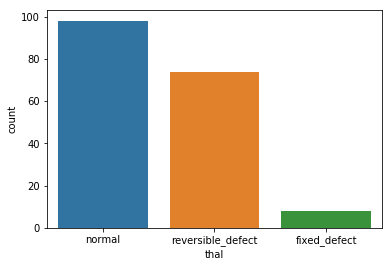

In [4]:
sns.countplot(x='thal', data=heart)

Make a horizontal bar plot with **`y`**.

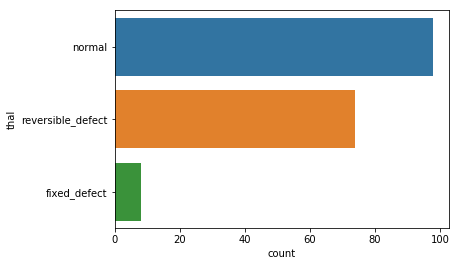

In [5]:
sns.countplot(y='thal', data=heart)

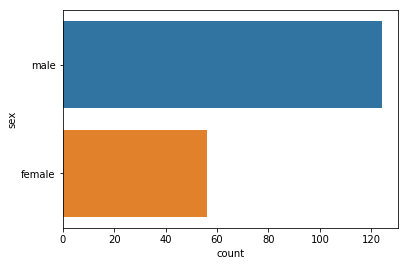

In [6]:
sns.countplot(y='sex', data=heart)

## Adjusting Seaborn plots
Unfortunately Seaborn doesn't supply us with an easy way to change the figure size or rotate ticks. We have to use matplotlib for this. Regular Seaborn plots return a Matplotlib Axes object. We can use this to control the plot.

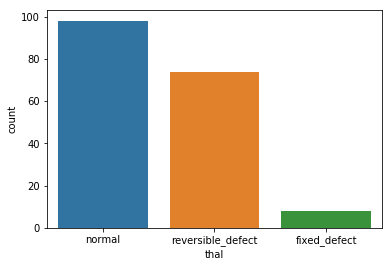

In [7]:
ax = sns.countplot(x='thal', data=heart)

### Must use Matplotlib

Unfortunately, you cannot control the figure size nor the tick rotation with the seaborn functions. You must resort to matplotlib. 

ValueError: keyword labelrotation is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop']

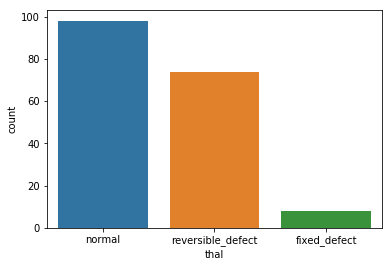

In [8]:
ax = sns.countplot(x='thal', data=heart)
ax.tick_params(labelrotation=90)

If you want to control the size of the figure do so with `ax` by going up a level and selecting the Figure object itself.

ValueError: keyword labelrotation is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop']

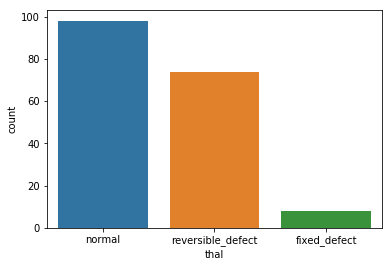

In [9]:
ax = sns.countplot(x='thal', data=heart)
ax.tick_params(labelrotation=45)
ax.figure.set_size_inches((12, 4))

## All other Seaborn "categorical" plots must use continuous values

In [10]:
heart.head()

,slope,thal,rest_bp,chest_pain,num_major_vessels,sugar,rest_ekg,chol,oldpeak,sex,age,max_heart_rate,angina,disease
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


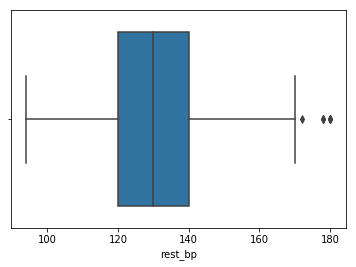

In [11]:
sns.boxplot(x='rest_bp', data=heart)

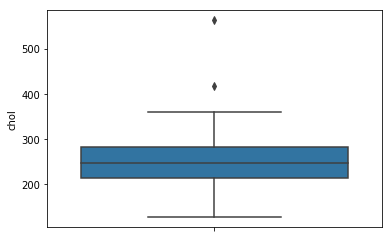

In [12]:
sns.boxplot(y='chol', data=heart)

Violin plots put the KDE on both sides of the line. They don't add much value here, but will if their violin is split.

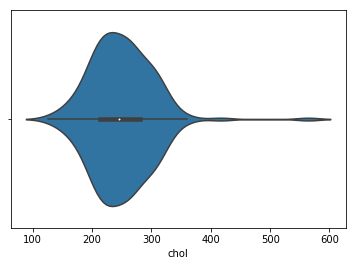

In [13]:
sns.violinplot(x='chol', data=heart)

## Bivariate Plots
Much more interesting plots can be made with bivariate plots. With the categorical plots, make sure one of the x or y is a categorical.

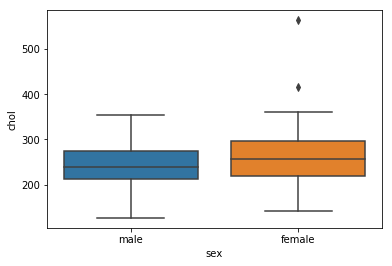

In [14]:
sns.boxplot(x='sex', y='chol', data=heart)

By default, a bar plot will average. The black line is the 95% confidence interval

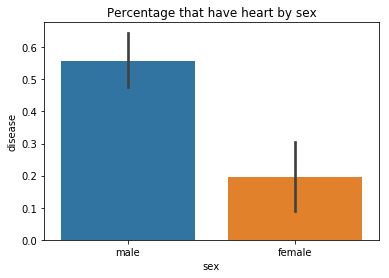

In [15]:
ax = sns.barplot(x='sex', y='disease', data=heart)
ax.set_title('Percentage that have heart by sex')

Use a numpy function to change aggregation

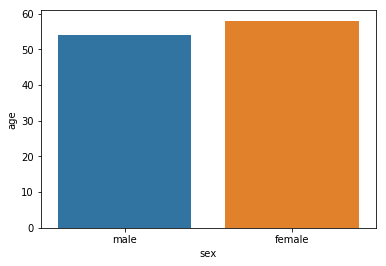

In [16]:
sns.barplot(x='sex', y='age', data=heart, ci=0, estimator=np.median)

Point plot is like a bar plot but just with the point and not a bar.

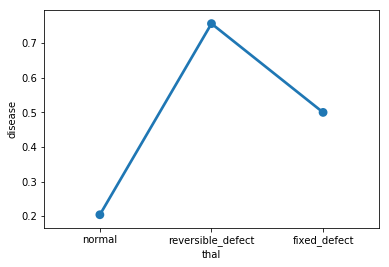

In [17]:
sns.pointplot(x='thal', y='disease', data=heart, ci=0)

## Add another dimension with `hue` parameter

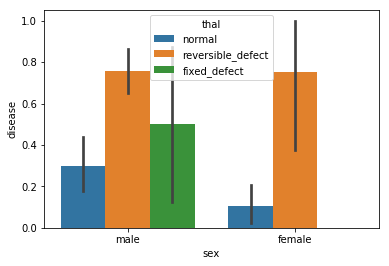

In [18]:
sns.barplot(x='sex', y='disease', hue='thal', data=heart)

Countplots can't have both an x and a y, but can have hue

In [19]:
heart.head()

,slope,thal,rest_bp,chest_pain,num_major_vessels,sugar,rest_ekg,chol,oldpeak,sex,age,max_heart_rate,angina,disease
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


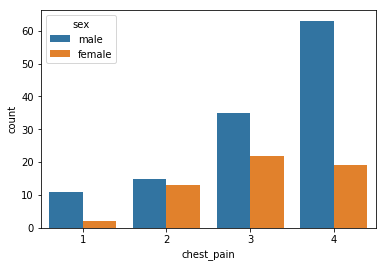

In [20]:
sns.countplot(x='chest_pain', hue='sex', data=heart)

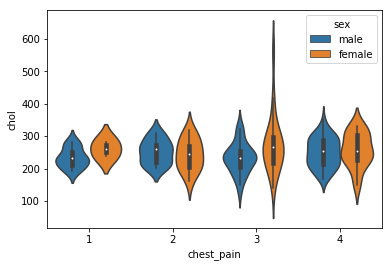

In [21]:
sns.violinplot(x='chest_pain', y='chol', hue='sex', data=heart)

Better usecase of violin plots are to use split=True

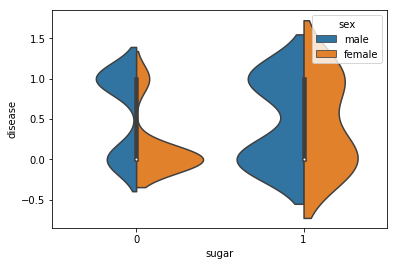

In [22]:
sns.violinplot(x='sugar', y='disease', hue='sex', data=heart, split=True)

# Practice Categorical Plots with x, y, and hue

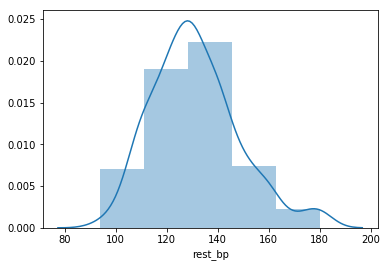

In [30]:
sns.distplot(heart['rest_bp'], bins=5)

# Add 4th a 4th dimensions with `catplot`
The `catplot` function is a like a 'meta' plotting function. You must tell it what kind of categorical plot to make. 

It takes the same parameters **`x, y, hue`** but also adds **`col`** to make grids of plots.

### Begin with making a single plot with `catplot`
You can still use `catplot` to make a single plot. Just make sure to use the `kind` parameter to choose the actual type of plot you want to make.

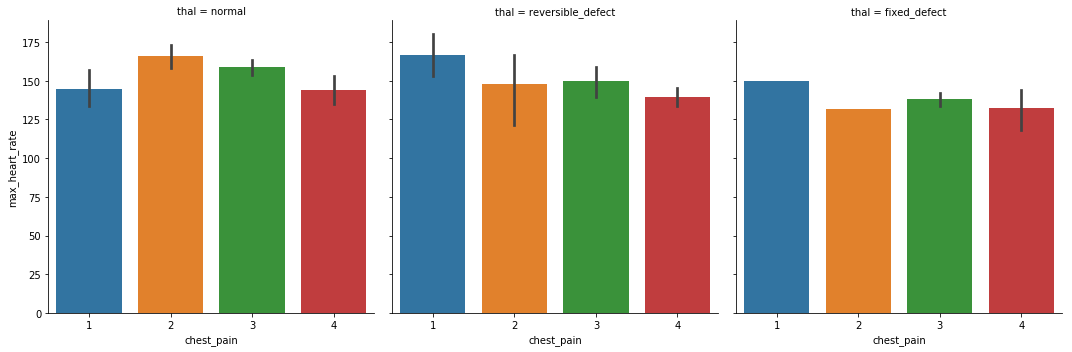

In [23]:
sns.catplot(x='chest_pain', y='max_heart_rate', data=heart, kind='bar', col='thal')

## Bin the ages to make another categorical variable

In [24]:
heart['age_bin'] = pd.cut(heart['age'], bins=6, precision=0)
heart['age_bin'].value_counts()

(53.0, 61.0]    56
(61.0, 69.0]    42
(45.0, 53.0]    37
(37.0, 45.0]    32
(69.0, 77.0]     8
(29.0, 37.0]     5
Name: age_bin, dtype: int64

Use `col_wrap` to wrap long output.

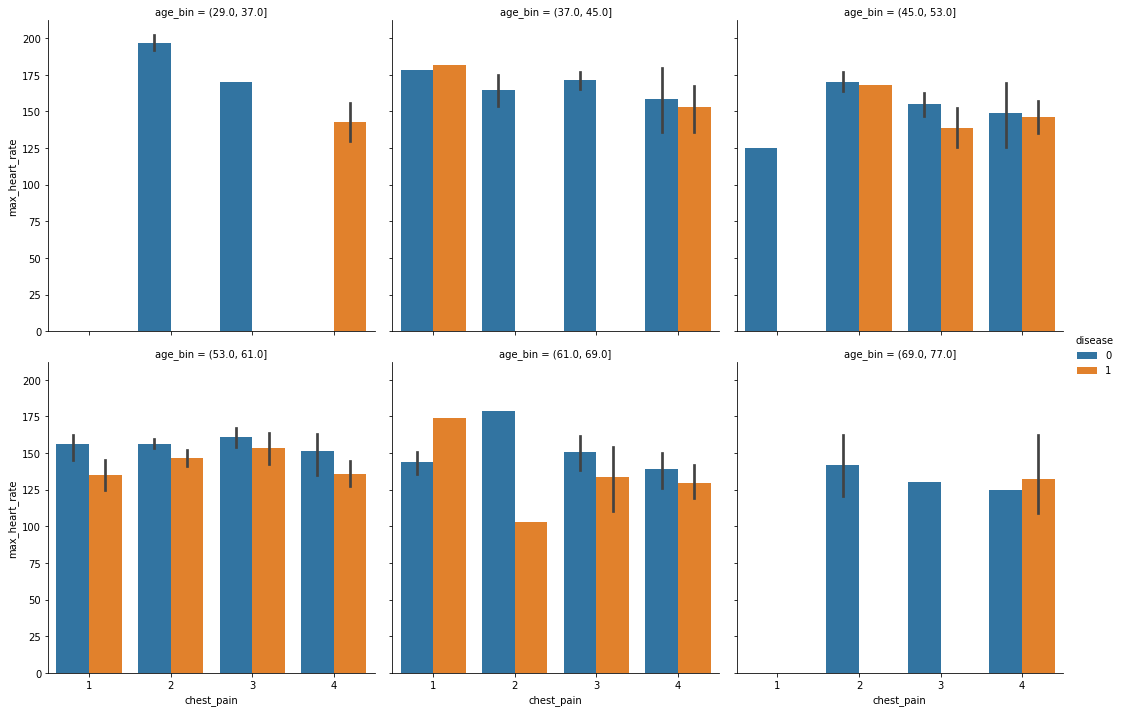

In [25]:
sns.catplot(x='chest_pain', y='max_heart_rate', hue='disease', 
            data=heart, kind='bar', col='age_bin', col_wrap=3)

### Add a fifth dimension with the `row` and `col` parameters of `catplot`

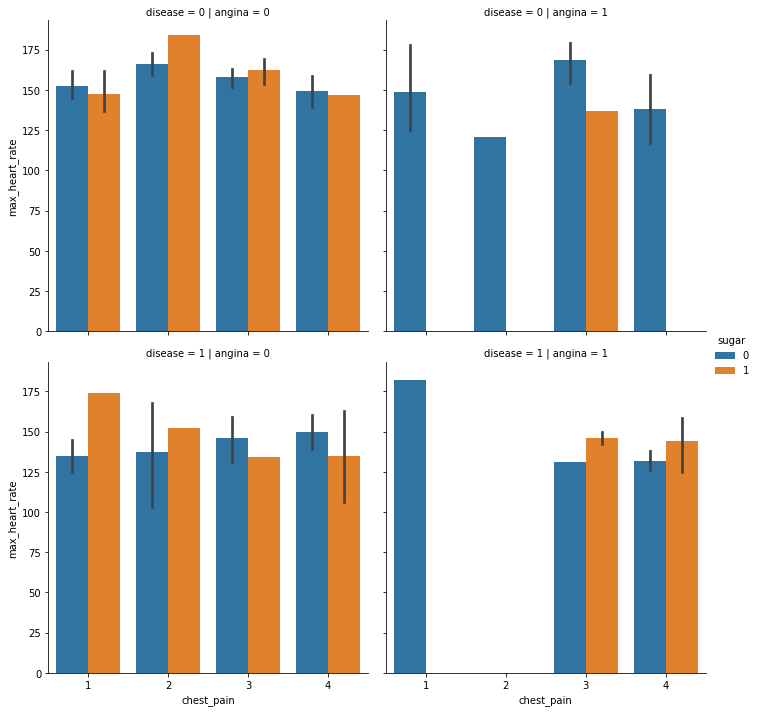

In [26]:
sns.catplot(x='chest_pain', y='max_heart_rate', hue='sugar', data=heart, kind='bar', col='angina', row='disease')

## Practice with `catplot`
Make sure to set the kind of plot you want with `kind`.

In [ ]:
# your code here

## `distplot` for KDE and Histogram in one

For some reason there is no `data` parameter

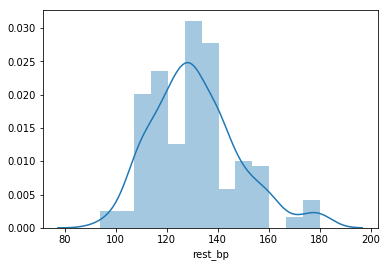

In [41]:
sns.distplot(heart['rest_bp'])

# Plotting with two continuous variables
**`regplot, scatterplot, lmplot`** are all very similar

**`regplot`** stands for regression plot and creates a scatter plot with a regression line.

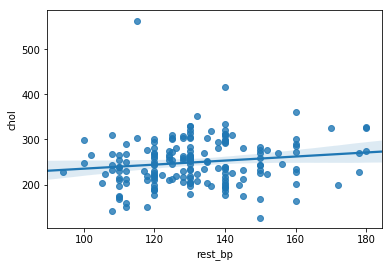

In [42]:
sns.regplot(x='rest_bp', y='chol', data=heart)

**`lmplot`** is the same as **`regplot`** but allows for **`hue`** and makes grids with **`row`** and **`col`**.

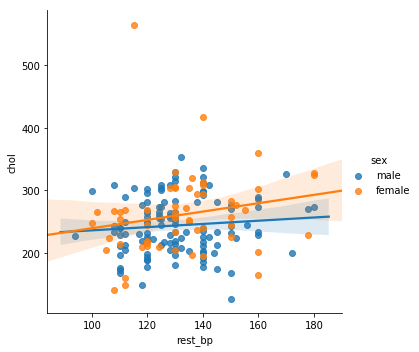

In [43]:
sns.lmplot(x='rest_bp', y='chol', data=heart, hue='sex')

In [44]:
heart.head()

,slope,thal,rest_bp,chest_pain,num_major_vessels,sugar,rest_ekg,chol,oldpeak,sex,age,max_heart_rate,angina,disease,age_bin
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0,"(37.0, 45.0]"
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0,"(53.0, 61.0]"
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1,"(69.0, 77.0]"
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1,"(37.0, 45.0]"
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0,"(53.0, 61.0]"


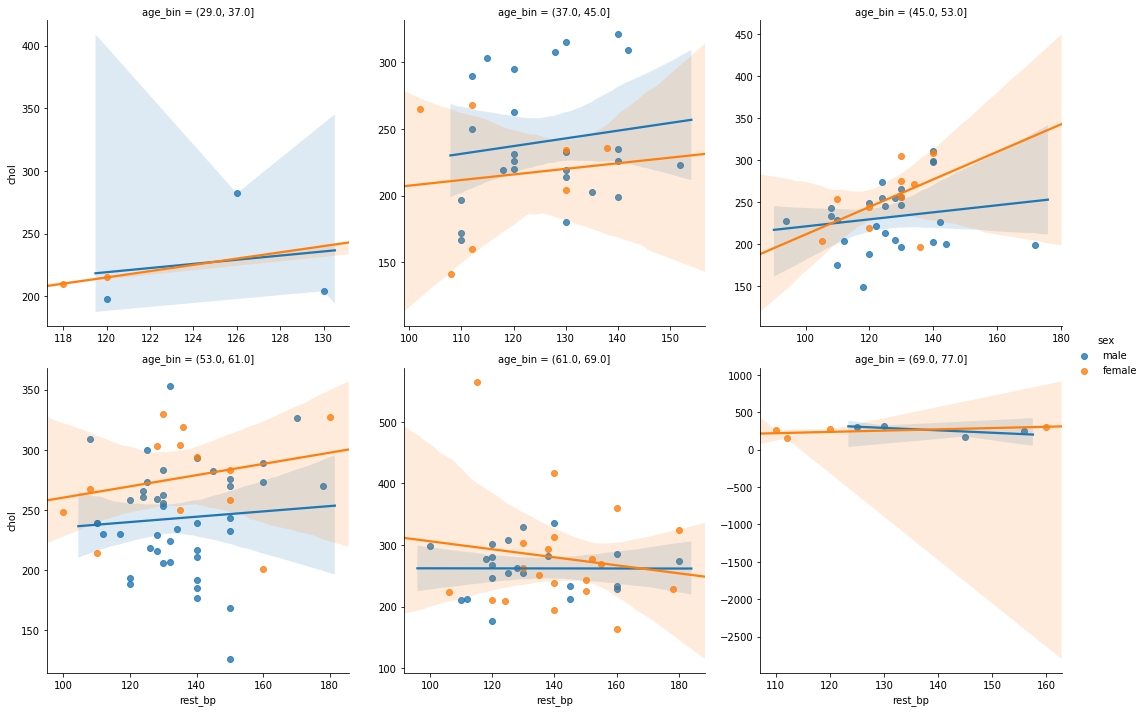

In [45]:
sns.lmplot(x='rest_bp', y='chol', data=heart, hue='sex', 
           col='age_bin', col_wrap=3, sharex=False, sharey=False)

## Matrix plots
The same relationship exists between **`heatmap`**(axes plot) and its more powerful grid plot, **`clustermap`**. Matrix plots do not accept tidy data directly. The data needs to be pivoted or aggregated (like the data below).

## clustermap
**`clustermap`** creates a heat map and performs hierarchical clustering at the same time. It will rearrange the column order so that the closest clusters of columns will appear together. The clustering is visualized with a dendogram outside of both the x and y axes. 

The **`college`** dataset below shows a strong cluster for math and verbal SAT scores. The lower the height of the clustering branch in the dendogram, the stronger the relationship. Pell grants and percent loans are the next group clustered together and are both negatively correlated with SAT scores.

In [46]:
corr = heart.corr()

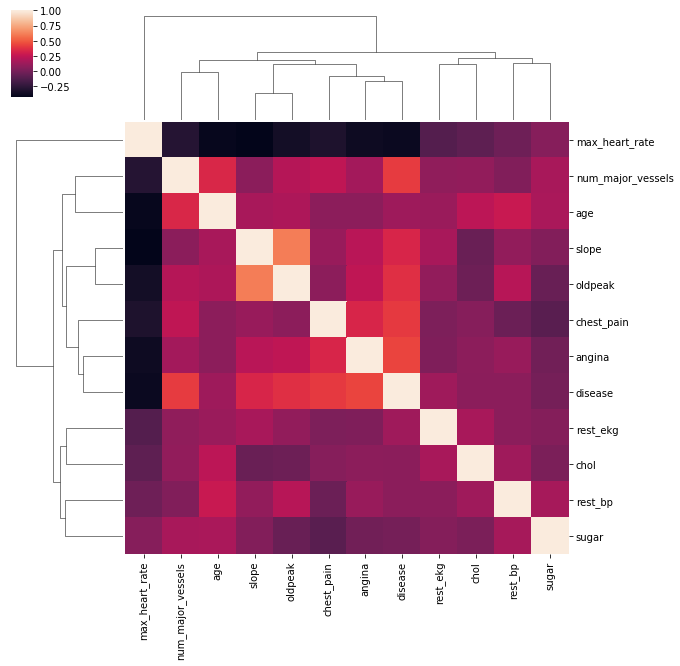

In [47]:
sns.clustermap(corr)

### Verify the negative relationship

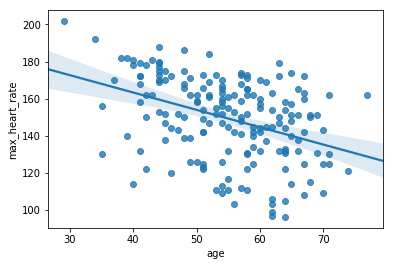

In [48]:
sns.regplot('age', 'max_heart_rate', data=heart)

# Also look at `pairplot`
Plots all continuous columns against each other. Very slow if too many columns.

# Practice Here
Explore any of the dataset in the data folder.

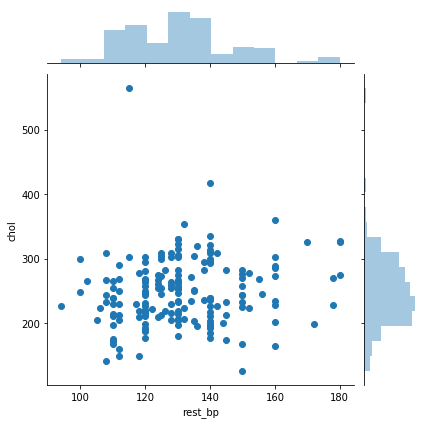

In [50]:
sns.jointplot(x='rest_bp', y='chol', data=heart)